In [2]:
using Plots; gr()
using Interact

In [ ]:
addprocs(8)

In [4]:
push!(LOAD_PATH, joinpath(pwd(), "src"))
using DifferentialPrivacy
using LinearBandits

INFO: Recompiling stale cache file /home/roshan/.julia/lib/v0.6/Distributions.ji for module Distributions.


In [5]:
struct ExpResult{X, Y}
    x :: X
    data :: Y
end

@recipe function f(result::ExpResult)
    x := result.x
    y := mean(result.data, 2)
    ribbon := std(result.data, 2)/√size(result.data, 2)
    marker --> true
    ()
end

# Experiment 1

$k = d^2$, optimal arm has reward 0.5, suboptimal arm rewards ${}\in[-1, 0.25]$, $\sigma=1.0$

In [9]:
dims = [round(Int, d) for d=logspace(log10(10), log10(200), 20)]
runs = 24
exp1results = @time ExpResult(dims,
    pmap(d for d=dims, _=1:runs) do dim
        horizon = 1000
        alg = LinearBandits.EllipLinUCB(dim, horizon)
        arms = LinearBandits.gaparms(dim, dim^2, 0.25, 0.5)()
        LinearBandits.runexperiment(alg, horizon, ()->arms, false, 1.0)[end]
    end)

3289.185428 seconds (257.07 k allocations: 11.501 MiB, 0.00% gc time)


ExpResult{Array{Int64,1},Array{Float64,2}}([10, 12, 14, 16, 19, 22, 26, 30, 35, 41, 48, 57, 66, 78, 91, 106, 125, 146, 171, 200], [385.55 18.8811 … 125.638 25.7036; 25.2572 128.725 … 146.595 165.245; … ; 464.221 493.287 … 460.161 488.911; 473.259 482.597 … 482.263 479.72])

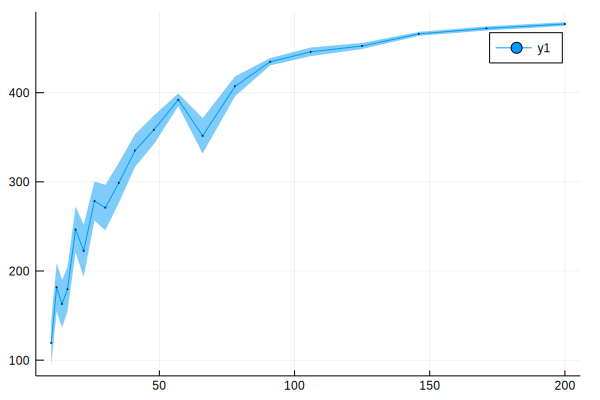

In [10]:
plot(exp1results)

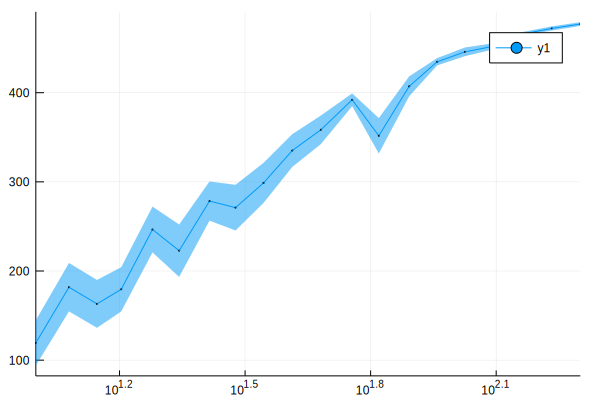

In [11]:
plot(exp1results, xaxis=:log)

# Experiment 2
Same as Experiment 1, but with $\sigma=0.1$

In [ ]:
dims = [round(Int, d) for d=logspace(log10(10), log10(200), 20)]
runs = 24
exp2results = @time ExpResult(dims,
    pmap(d for d=dims, _=1:runs) do dim
        horizon = 1000
        alg = LinearBandits.EllipLinUCB(dim, horizon)
        makearms = () -> LinearBandits.gaparms(dim, dim^2, 0.25, 0.5)()
        LinearBandits.runexperiment(alg, horizon, makearms, false, 0.1)[end]
    end)

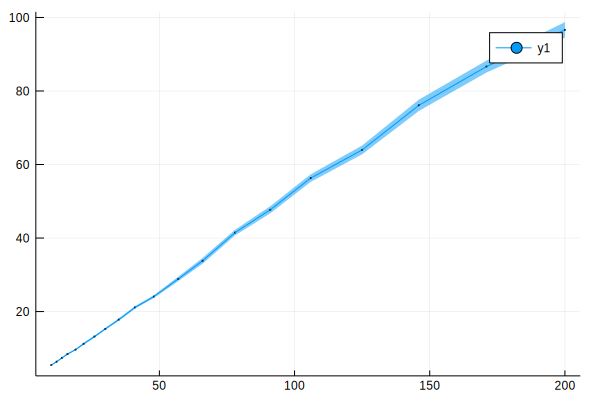

In [12]:
plot(exp2results)

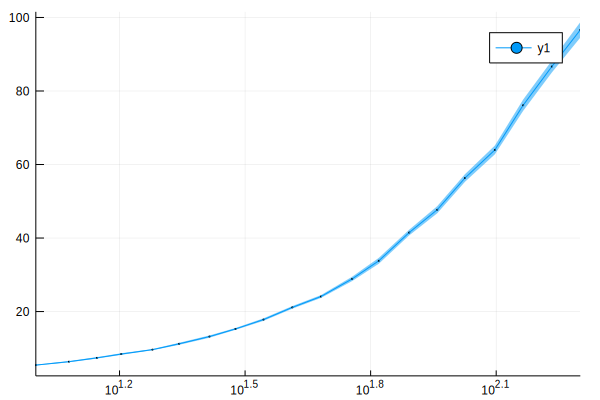

In [13]:
plot(exp2results, xaxis=:log)

# Experiment 3
Orthonormal arms, random $\theta$, $\sigma=0.1$

 68.764149 seconds (241.26 k allocations: 10.963 MiB)


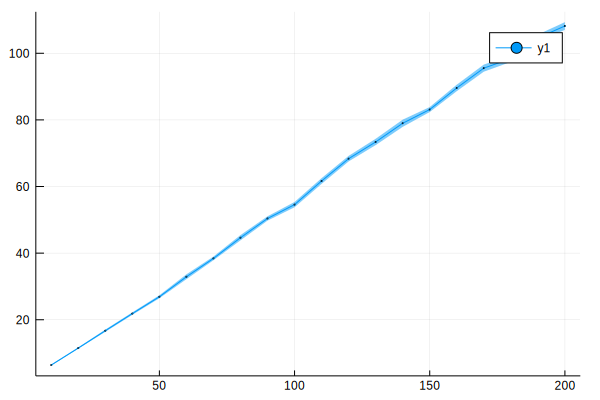

In [52]:
dims = [round(Int, d) for d=linspace(10, 200, 20)]
runs = 50
orthoresults = @time ExpResult(dims,
    pmap(d for d=dims, _=1:runs) do dim
        horizon = 1000
        alg = LinearBandits.EllipLinUCB(dim, horizon)
        makearms = LinearBandits.orthoarms(dim)
        LinearBandits.runexperiment(alg, horizon, makearms, true, 0.1)[end]
    end)
plot(orthoresults)